## This notebook contains the initial data analyses of assignment 2. The purpose of the following analyses is largely exploratory.

In [2]:
#import libraries we'll be using
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data sets
person1 = pd.read_csv('person1-step-data.csv')
person2 = pd.read_csv('person2-step-data.csv')

In [4]:
#drop na values
df1 = person1.dropna()
df2 = person2.dropna()

In [5]:
#we'll change the data type of the Date column to a datetime data type so that we can perform time sensitive analyses later on.
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

In [6]:
#get unique values for Source variable for both data sets
for i in df1['Source'].unique():
    print(i)
for i in df2['Source'].unique():
    print(i)

Person1 iPhone SE
Person1 Mi Fit
Person1 Misfit
Person1 Health Mate
Person1 Apple Watch
Person2 Phone
Person2 Watch


In [9]:
print(len(df1['Date'].unique()))
print(len(df2['Date'].unique()))

2295
2490


In [10]:
type(df1['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
#create a new collumn for both data sets that symbolises day of the week
df1['Day of the Week'] = df1['Date'].dt.weekday
df2['Day of the Week'] = df2['Date'].dt.weekday

,Source,Date,Hour,Count,Day of the Week
0,Person2 Phone,2014-11-29,6,6,5
1,Person2 Phone,2014-11-29,6,4,5
2,Person2 Phone,2014-11-29,6,3,5
3,Person2 Phone,2014-11-29,6,9,5
4,Person2 Phone,2014-11-29,6,6,5
...,...,...,...,...,...
486254,Person2 Watch,2021-09-22,14,71,2
486255,Person2 Phone,2021-09-22,14,72,2
486256,Person2 Phone,2021-09-22,15,78,2
486257,Person2 Watch,2021-09-22,15,32,2


(array([27142., 25815.,     0., 26503.,     0., 27535., 28354.,     0.,
        24328., 24110.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

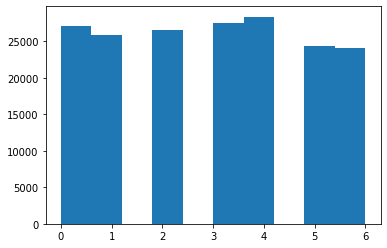

In [19]:
#person1 day of the weeks histogram
plt.hist(df1['Day of the Week'])

(array([67050., 69027.,     0., 71744.,     0., 70374., 78795.,     0.,
        57330., 71939.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

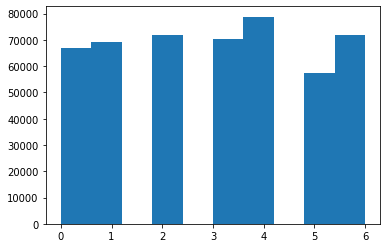

In [20]:
#person2 day of the weeks histogram
plt.hist(df2['Day of the Week'])

In [39]:
gdf1 = df1.groupby('Day of the Week')
for i in range(7):
    print(gdf1.get_group(i)['Count'].mean(), "  ", gdf1.get_group(i)['Count'].median())

74.55710706653895    17.0
79.40658531861321    17.0
79.16417009395163    18.0
86.85868894134738    17.0
77.488361430486    17.0
72.09840512989149    17.0
89.18639568643717    18.0


In [38]:
gdf2 = df2.groupby('Day of the Week')
for i in range(7):
    print(gdf2.get_group(i)['Count'].mean(), "  ", gdf2.get_group(i)['Count'].median())

69.4503057419836    29.0
75.31519550320888    32.0
68.71656166369313    29.0
72.4506635973513    33.0
64.1401738689003    28.0
72.60556427699285    30.0
78.6897927410723    36.0


<Figure size 576x216 with 0 Axes>

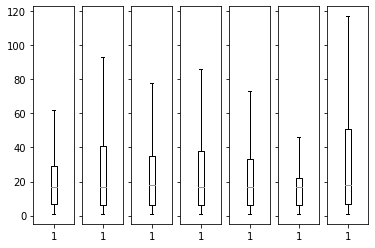

In [66]:
fig = plt.figure(figsize = (8,3))
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 7, sharey=True)
ax0.rect = [5,5,55,150]
ax0.boxplot(gdf1.get_group(0)['Count'], showfliers=False)
ax1.boxplot(gdf1.get_group(1)['Count'], showfliers=False)
ax2.boxplot(gdf1.get_group(2)['Count'], showfliers=False)
ax3.boxplot(gdf1.get_group(3)['Count'], showfliers=False)
ax4.boxplot(gdf1.get_group(4)['Count'], showfliers=False)
ax5.boxplot(gdf1.get_group(5)['Count'], showfliers=False)
ax6.boxplot(gdf1.get_group(6)['Count'], showfliers=False)
plt.savefig("person1 count grouped by days boxplot.png")